# bounding boxes

In [4]:
(ns opencv4.boundingboxes
(:require
  [opencv4.core :refer :all]
  [opencv4.colors.rgb :as rgb]
  [opencv4.utils :as u]))

; http://docs.opencv.org/2.4/doc/tutorials/imgproc/shapedescriptors/bounding_rects_circles/bounding_rects_circles.html

nil

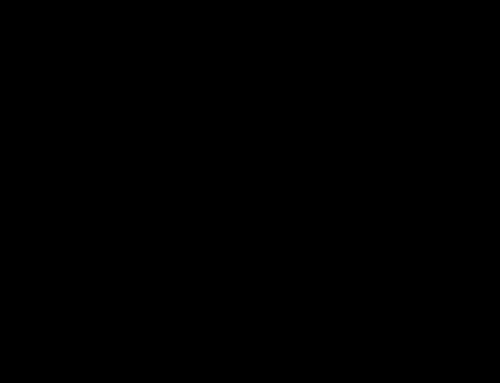

In [5]:
(def kikyu
  (-> "resources/chapter03/mongolfieres.jpg"
   imread))

(u/>>> kikyu)

(def wrong-mask
  (-> kikyu 
      clone 
      (cvt-color! COLOR_BGR2GRAY)
 	  (threshold! 250 255 THRESH_BINARY)
      (median-blur! 7)))

(u/>>> wrong-mask)

In [6]:
; to be removed once:
; https://github.com/hellonico/origami/issues/56
; is fixed:
(defn in-range!
  ([org_opencv_core_mat_0 org_opencv_core_scalar_1 org_opencv_core_scalar_2]
  (in-range org_opencv_core_mat_0 org_opencv_core_scalar_1 org_opencv_core_scalar_2 org_opencv_core_mat_0) org_opencv_core_mat_0))

#'opencv4.boundingboxes/in-range!

In [7]:
(def mask
  (-> kikyu 
      clone 
      (cvt-color! COLOR_RGB2HSV)
 	  (in-range! (new-scalar 10 30 30) (new-scalar 30 255 255))
      (median-blur! 7)
      ))

(u/>>> mask)

(def work (-> mask bitwise-not!))

#'opencv4.boundingboxes/work